In [8]:
import FdsPy.qe.myqengine as qe

univ = qe.IdUniverse(['CC_US'])
ts = qe.TimeSeries(start_date='-50Y',end_date = '0M',frequency='M',calendar='FIVEDAY')

data_dict = {'M2': 'FLOAT(FDS_ECON_DATA("US.MAM2",#DATE,#DATE,M,STEP,STOCKEND,1))',
  'CPI': 'FLOAT(FDS_ECON_DATA("US.CPIALL",#DATE,#DATE,M,STEP,AVERAGE,1))',
  'US_MORT_APPS_Purchases': 'FLOAT(FDS_ECON_DATA("US.HCMORG",#DATE,#DATE,M,STEP,AVERAGE,1))',
  'US_MORT_APPS_Market': 'FLOAT(FDS_ECON_DATA("MBAMKTINDEXSA",#DATE,#DATE,M,STEP,AVERAGE,1))',
  'US_IMP': 'FLOAT(FDS_ECON_DATA("US.FTIMP",#DATE,#DATE,M,STEP,SUM,1))',
  'US_EXP': 'FLOAT(FDS_ECON_DATA("US.FTEXP",#DATE,#DATE,M,STEP,SUM,1))',
  'PMI': 'FLOAT(FDS_ECON_DATA("ISMPMI@M",#DATE,#DATE,M,STEP,AVERAGE,1))',
  'FED_FUND_EFF_RATE': 'FLOAT(SPEC_ID_DATA("REFFFUNDEFF-FDS:FG_YIELD(,\'YTM\')",#DATE,#DATE,M,NONE,NONE,2))',
  'FED_FUND_TAR_RATE': 'FLOAT(SPEC_ID_DATA("REFFFUND-FDS:FG_YIELD(,\'YTM\')",#DATE,#DATE,M,NONE,NONE,2))'
              }

req = qe.Calculation(universe = univ,dates = ts, data_dict=data_dict,source='FqlExpression')
req.query()

req.data

,DATE,UNIVERSE,M2,CPI,US_MORT_APPS_Purchases,US_MORT_APPS_Market,US_IMP,US_EXP,PMI,FED_FUND_EFF_RATE,FED_FUND_TAR_RATE
0,19721229,CC_US,802.3,42.500,NaN,NaN,NaN,NaN,70.5,5.50,5.6250
1,19730131,CC_US,810.3,42.700,NaN,NaN,NaN,NaN,72.1,6.50,6.2500
2,19730228,CC_US,814.1,43.000,NaN,NaN,NaN,NaN,69.6,7.50,6.6875
3,19730330,CC_US,815.3,43.400,NaN,NaN,NaN,NaN,69.6,7.38,7.0000
4,19730430,CC_US,819.7,43.700,NaN,NaN,NaN,NaN,67.7,7.63,7.2500
...,...,...,...,...,...,...,...,...,...,...,...
604,20230428,CC_US,20712.1,302.918,169.025,217.500,322319.0,249306.0,47.1,4.83,5.0000
605,20230531,CC_US,20841.7,303.294,162.950,211.275,314637.0,247855.0,46.9,5.08,5.2500
606,20230630,CC_US,20890.0,303.841,162.640,207.180,311458.0,247740.0,46.0,5.08,5.2500
607,20230731,CC_US,20902.7,304.348,160.450,206.675,316683.0,251660.0,46.4,5.33,5.5000


In [14]:
import pandas as pd
df = req.data.copy()
df['DATE'] = pd.to_datetime(df['DATE'])
df=df.set_index('DATE')
#df.to_csv('../../data/misc/us_macro_data_20230922.csv')

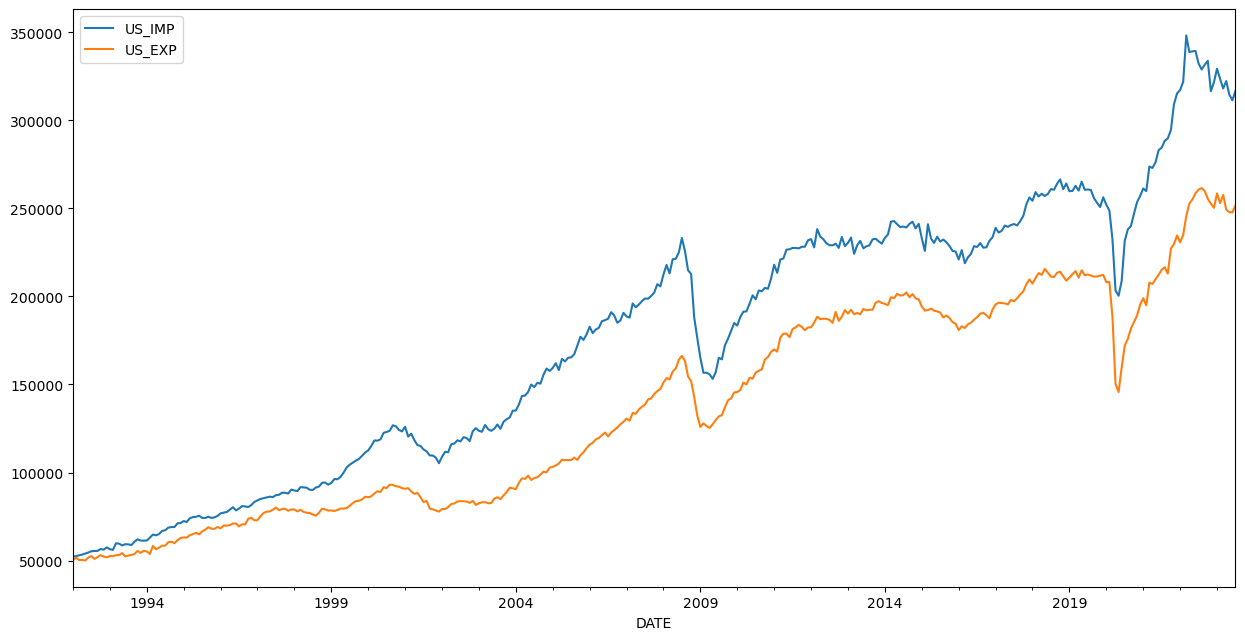

In [82]:
import matplotlib.pyplot as plt
import datetime
df[['US_IMP','US_EXP']].dropna().plot(figsize = (15,7.5))
plt.show()


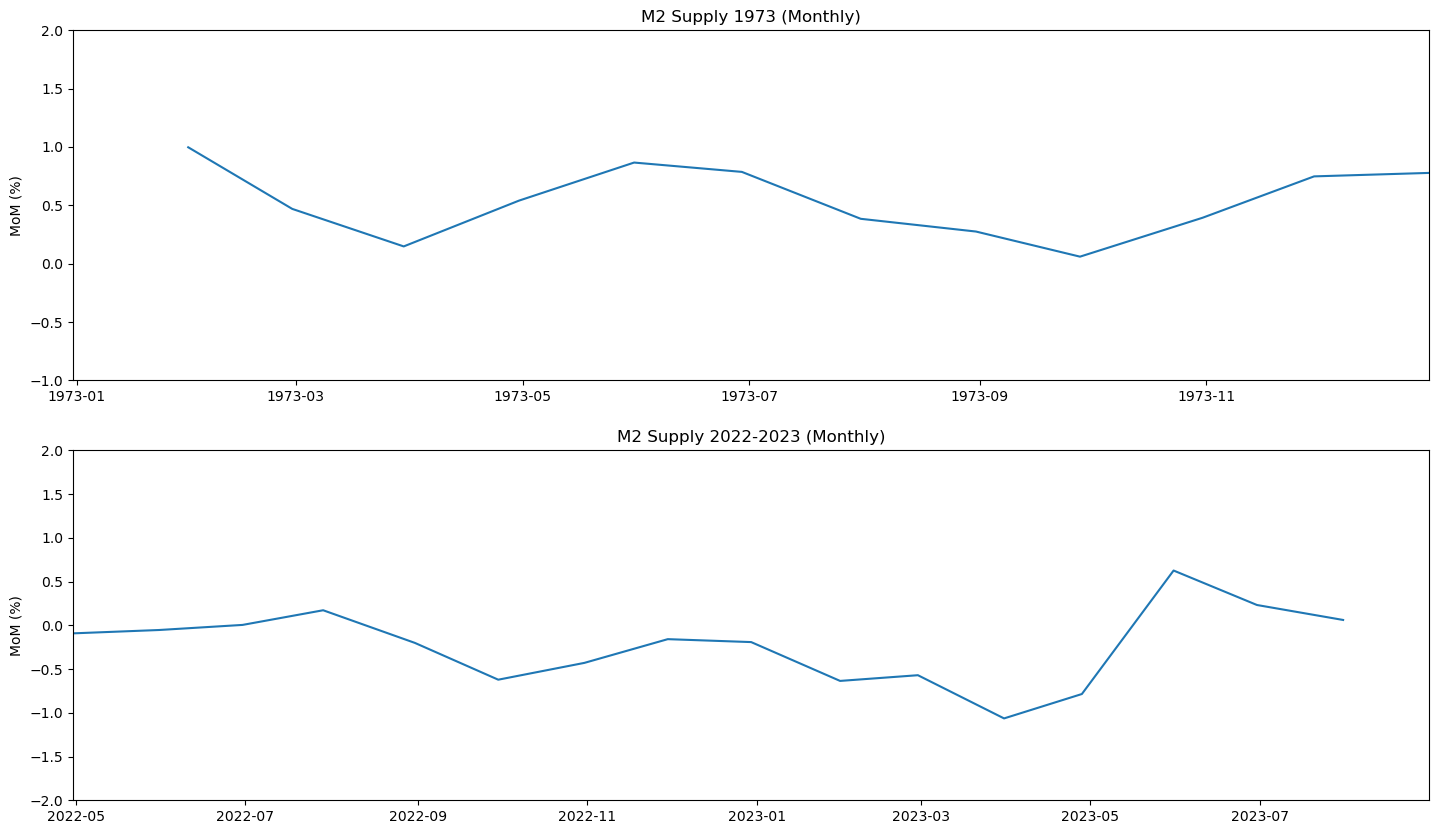

In [79]:

temp = df['M2'].dropna().pct_change()*100
fig,axs = plt.subplots(2,1,figsize = (17.5,10))
axs[0].plot(temp)
axs[0].set_xlim(datetime.datetime(1972, 12, 31), datetime.datetime(1973, 12, 31))
axs[0].set_title('M2 Supply 1973 (Monthly)')
axs[0].set_ylabel('MoM (%)')
axs[0].set_ylim(-1,2)

axs[1].plot(temp)
axs[1].set_xlim(datetime.datetime(2022, 4, 30), datetime.datetime(2023, 8, 31))
axs[1].set_ylabel('MoM (%)')
axs[1].set_title('M2 Supply 2022-2023 (Monthly)')
axs[1].set_ylim(-2,2)
plt.show()

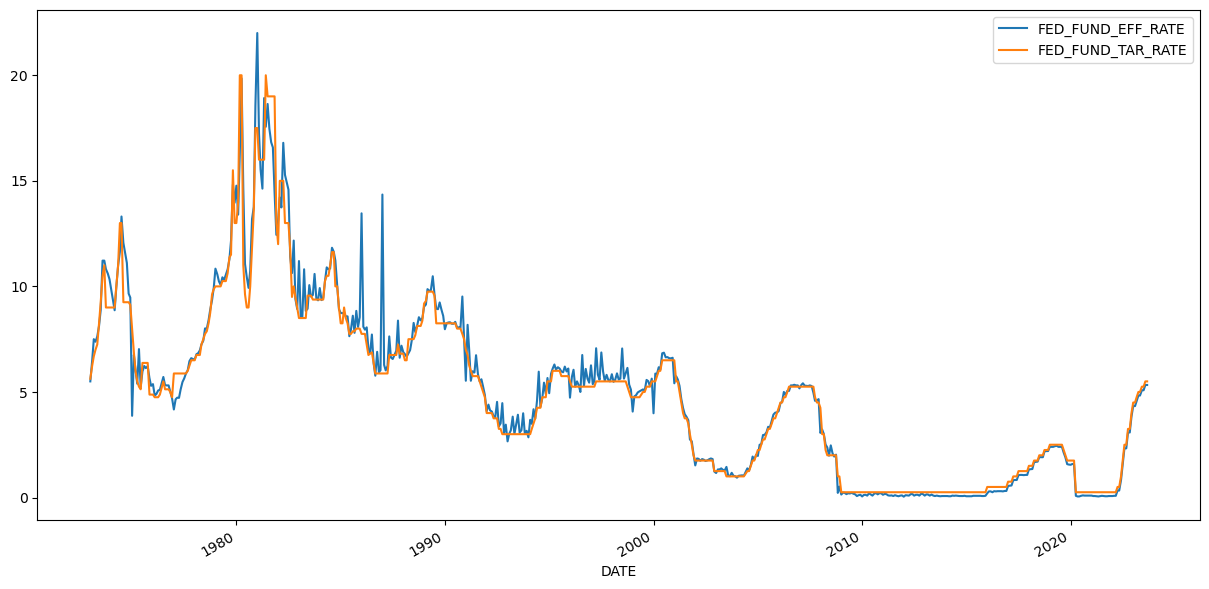

In [80]:


import matplotlib.pyplot as plt
import datetime
df[['FED_FUND_EFF_RATE','FED_FUND_TAR_RATE']].dropna().plot(figsize = (15,7.5))
plt.show()

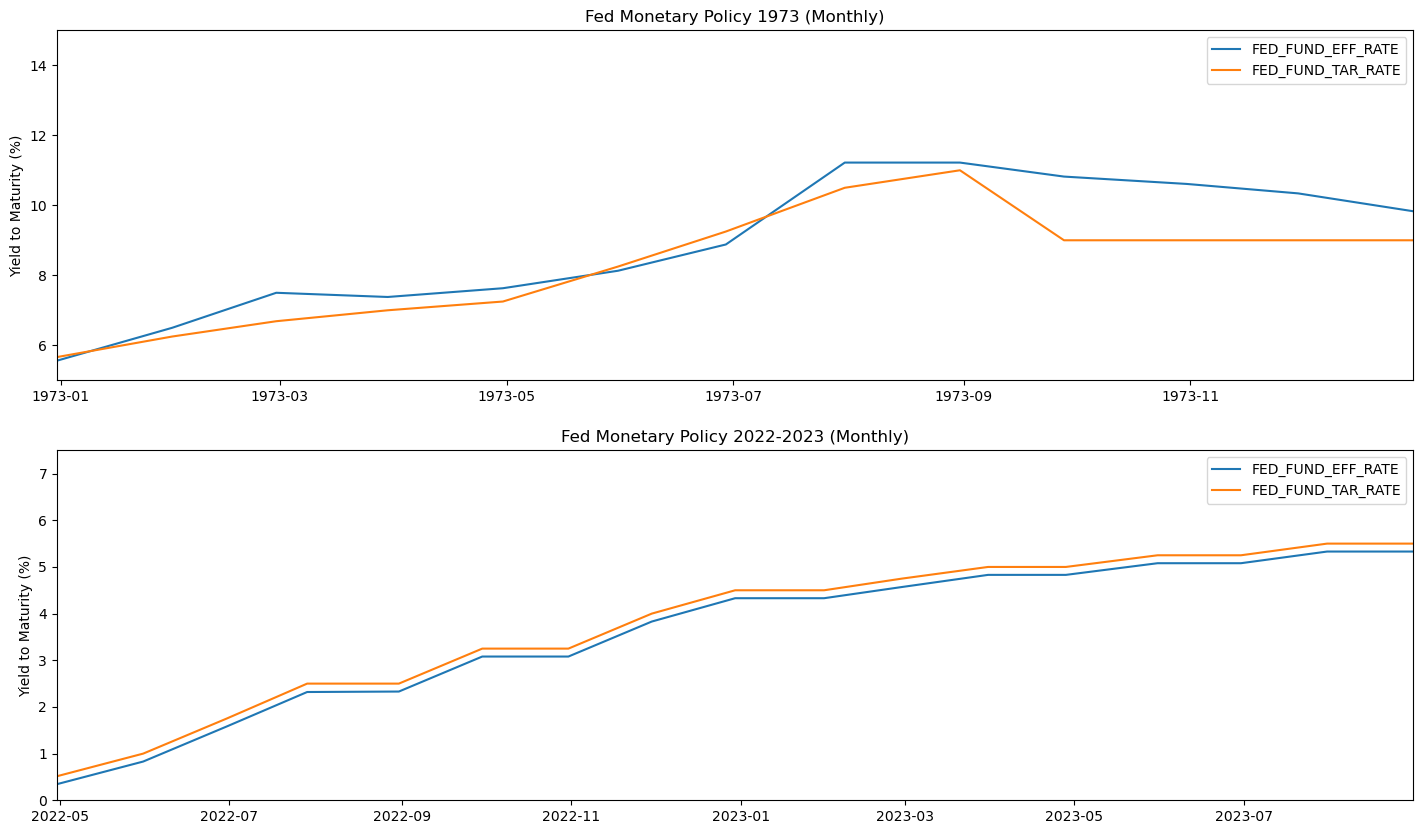

In [72]:

fig,axs = plt.subplots(2,1,figsize = (17.5,10))
axs[0].plot(df[['FED_FUND_EFF_RATE','FED_FUND_TAR_RATE']].dropna())
axs[0].set_xlim(datetime.datetime(1972, 12, 31), datetime.datetime(1973, 12, 31))
axs[0].set_title('Fed Monetary Policy 1973 (Monthly)')
axs[0].set_ylabel('Yield to Maturity (%)')
axs[0].legend(df[['FED_FUND_EFF_RATE','FED_FUND_TAR_RATE']].columns)
axs[0].set_ylim(5,15)

axs[1].plot(df[['FED_FUND_EFF_RATE','FED_FUND_TAR_RATE']].dropna())
axs[1].set_xlim(datetime.datetime(2022, 4, 30), datetime.datetime(2023, 8, 31))
axs[1].set_ylim(0,7.5)
axs[1].set_ylabel('Yield to Maturity (%)')
axs[1].legend(df[['FED_FUND_EFF_RATE','FED_FUND_TAR_RATE']].columns)
axs[1].set_title('Fed Monetary Policy 2022-2023 (Monthly)')
plt.show()

In [42]:
df['CPI_mom'] = df['CPI'].pct_change()*100

In [44]:
df['PMI_mom'] = df['PMI'].pct_change()*100

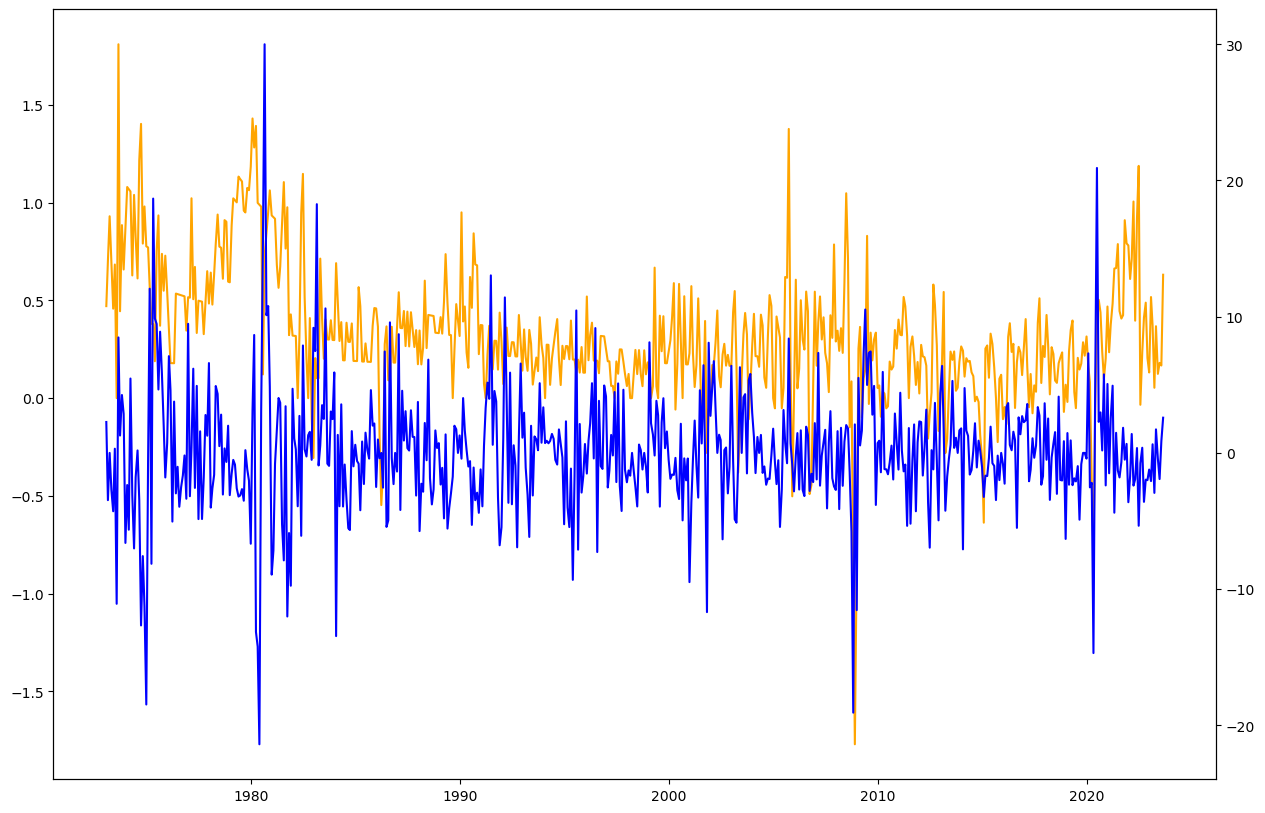

In [50]:
fig,ax = plt.subplots(figsize =(15,10))

ax.plot(df['CPI_mom'],color = 'orange')
ax2 = ax.twinx()
ax2.plot(df['PMI_mom'],color = 'blue')

plt.show()

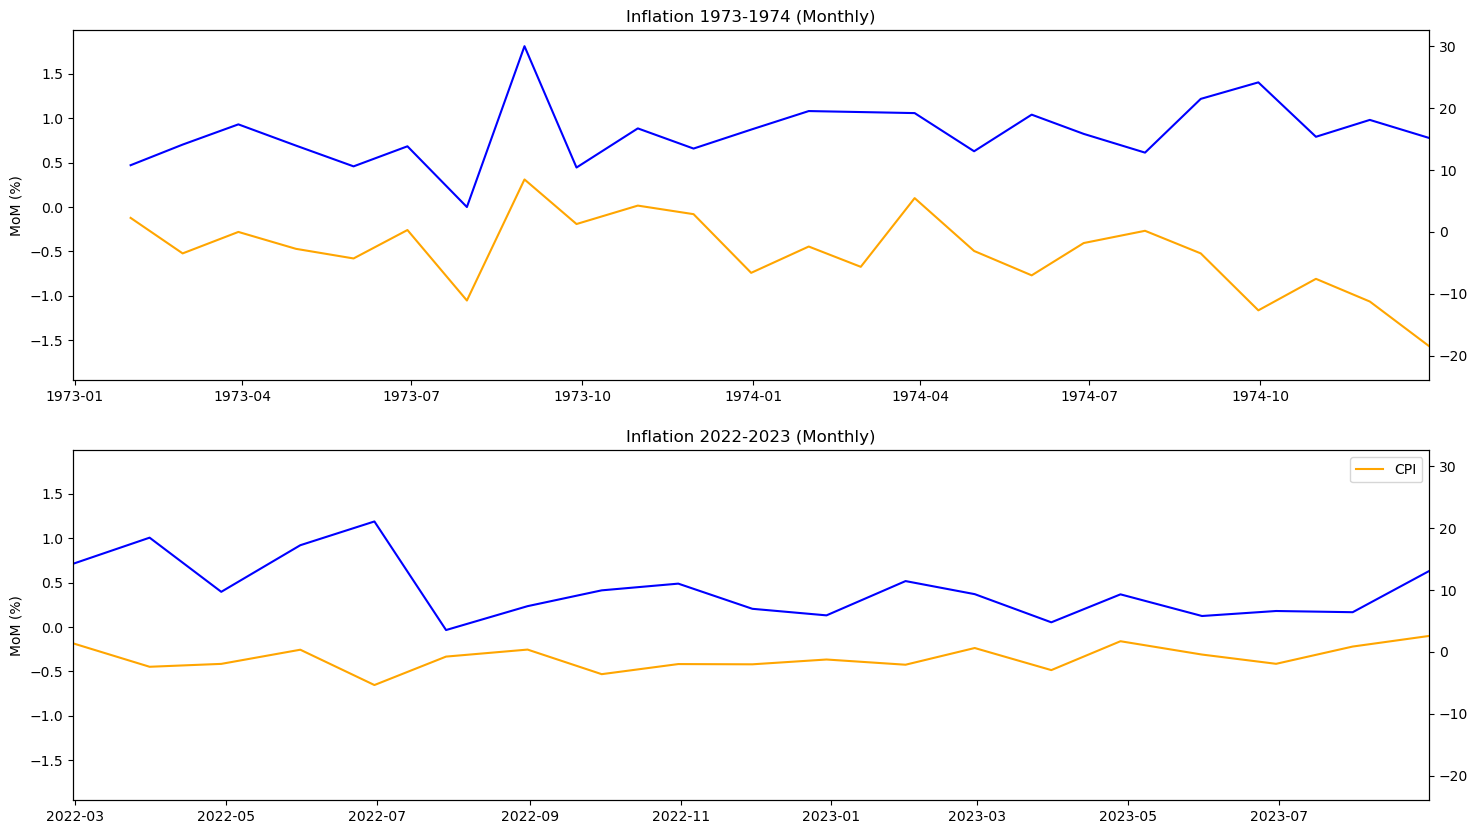

In [85]:
fig,axs = plt.subplots(2,1,figsize = (17.5,10))
axs[0].plot(df['CPI_mom'],color='blue')
axs0_2 = axs[0].twinx()
axs0_2.plot(df['PMI_mom'],color = 'orange')

axs[0].set_xlim(datetime.datetime(1972, 12, 31), datetime.datetime(1974, 12, 31))
axs[0].set_title('Inflation 1973-1974 (Monthly)')
axs[0].set_ylabel('MoM (%)')

axs[1].plot(df['CPI_mom'],color = 'blue')
axs1_2 = axs[1].twinx()
axs1_2.plot(df['PMI_mom'],color = 'orange')
axs[1].set_xlim(datetime.datetime(2022, 2, 28), datetime.datetime(2023, 8, 31))
axs[1].set_ylabel('MoM (%)')
axs[1].set_title('Inflation 2022-2023 (Monthly)')
plt.legend(['CPI','PMI'])
plt.show()